 UNET MODEL ANALYSIS

IMPORTING ALL LIBRARIES

In [2]:
import os
import cv2
import numpy as np
import tensorflow as tf
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate

LOADING THE PRETRAINED MODEL

In [6]:
model = tf.keras.models.load_model('unet_model.h5')

In [8]:
path_images = 'test/original_images'
path_masks = 'test/binary_images'

LAODING IAMGES 

In [11]:
def load_images(image_folder, mask_folder):
    images = []
    masks = []

    image_files = sorted([f for f in os.listdir(image_folder) if os.path.isfile(os.path.join(image_folder, f)) and f.endswith('.png')])
    mask_files = sorted([f for f in os.listdir(mask_folder) if os.path.isfile(os.path.join(mask_folder, f)) and f.endswith('.png')])

    if len(image_files) != len(mask_files):
        print(f"Number of images ({len(image_files)}) does not match number of masks ({len(mask_files)}).")
        return None, None

    print(f"Image Files: {image_files}")
    print(f"Mask Files: {mask_files}")

    for img_file, mask_file in zip(image_files, mask_files):
        img_path = os.path.join(image_folder, img_file)
        mask_path = os.path.join(mask_folder, mask_file)

        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            print(f"Failed to read image {img_file}.")
            continue
        
        img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))
        img = np.expand_dims(img, axis=-1) / 255.0  # Normalize and reshape
        
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
        if mask is None:
            print(f"Failed to read mask {mask_file}.")
            continue
        
        mask = cv2.resize(mask, (IMG_WIDTH, IMG_HEIGHT))
        mask = np.expand_dims(mask, axis=-1) / 255.0
        
        images.append(img)
        masks.append(mask)

    print(f"Successfully loaded {len(images)} images and {len(masks)} masks.")
    return np.array(images), np.array(masks)

In [13]:
IMG_HEIGHT, IMG_WIDTH = 128, 128
IMG_CHANNELS = 1

In [15]:
X_test,Y_test = load_images(path_images,path_masks)

Image Files: ['0001.png', '0002.png', '0003.png', '0004.png', '0005.png', '0006.png', '0007.png', '0008.png', '0009.png', '0010.png', '0011.png', '0012.png', '0013.png', '0014.png', '0015.png', '0016.png', '0017.png', '0018.png', '0019.png', '0020.png', '0021.png', '0022.png', '0023.png', '0024.png', '0025.png', '0026.png', '0027.png', '0028.png', '0029.png', '0030.png', '0031.png', '0032.png', '0033.png', '0034.png', '0035.png', '0036.png', '0037.png', '0038.png', '0039.png', '0040.png', '0041.png', '0042.png', '0043.png', '0044.png', '0045.png', '0046.png', '0047.png', '0048.png', '0049.png', '0050.png', '0051.png', '0052.png', '0053.png', '0054.png', '0055.png', '0056.png', '0057.png', '0058.png', '0059.png', '0060.png', '0061.png', '0062.png', '0063.png', '0064.png', '0065.png', '0066.png', '0067.png', '0068.png', '0069.png', '0070.png', '0071.png', '0072.png', '0073.png', '0074.png', '0075.png', '0076.png', '0077.png', '0078.png', '0079.png', '0080.png', '0081.png', '0082.png', '0

In [17]:
predictions = model.predict(X_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 34s 4s/step


In [19]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_19 (Conv2D)  │ (None, 128, 128,  │        640 │ input_layer_1[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_20 (Conv2D)  │ (None, 128, 128,  │     36,928 │ conv2d_19[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 64, 64,    │          0 │ conv2d_20[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_21 (Conv2D)  │ (None, 64, 64,    │     73,856 │ max_pooling2d_4[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_22 (Conv2D)  │ (None, 64, 64,    │    147,584 │ conv2d_21[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_5     │ (None, 32, 32,    │          0 │ conv2d_22[0][0]   │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_23 (Conv2D)  │ (None, 32, 32,    │    295,168 │ max_pooling2d_5[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_24 (Conv2D)  │ (None, 32, 32,    │    590,080 │ conv2d_23[0][0]   │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_6     │ (None, 16, 16,    │          0 │ conv2d_24[0][0]   │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_25 (Conv2D)  │ (None, 16, 16,    │  1,180,160 │ max_pooling2d_6[… │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_26 (Conv2D)  │ (None, 16, 16,    │  2,359,808 │ conv2d_25[0][0]   │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_7     │ (None, 8, 8, 512) │          0 │ conv2d_26[0][0]   │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_27 (Conv2D)  │ (None, 8, 8,      │  4,719,616 │ max_pooling2d_7[… │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_28 (Conv2D)  │ (None, 8, 8,      │  9,438,208 │ conv2d_27[0][0]   │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_4     │ (None, 16, 16,    │          0 │ conv2d_28[0][0]   │
│ (UpSampling2D)      │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_4       │ (None, 16, 16,    │          0 │ up_sampling2d_4[

 Total params: 31,377,795 (119.70 MB)

 Trainable params: 31,377,793 (119.70 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [21]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
model.evaluate(X_test, Y_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 33s 4s/step - accuracy: 0.9863 - loss: 0.0383


[0.03861866518855095, 0.9859650731086731]

In [25]:
y_true_flat = Y_test.flatten()  
y_pred_flat = predictions.flatten() 

In [27]:
y_true_flat = (y_true_flat > 0.5).astype(int)

ROC CURVE 

In [30]:
fpr, tpr, thresholds = roc_curve(y_true_flat, y_pred_flat)

In [32]:
roc_auc = auc(fpr, tpr)

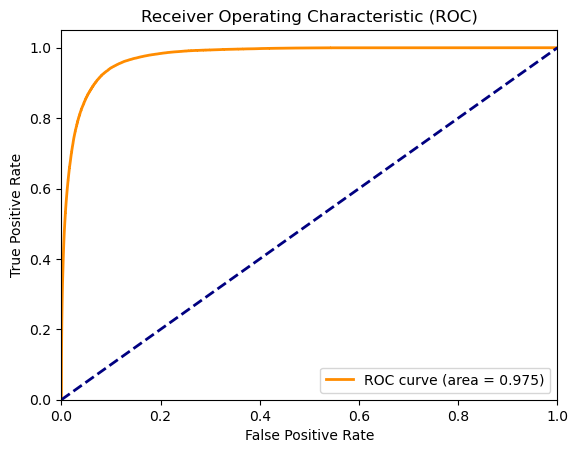

In [34]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

PRECISION - RECALL  F1 SCORE CURVE 

In [37]:
from sklearn.metrics import precision_recall_curve, auc

In [39]:
precision, recall, thresholds = precision_recall_curve(y_true_flat, y_pred_flat)

In [41]:
pr_auc = auc(recall, precision)

In [43]:
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)

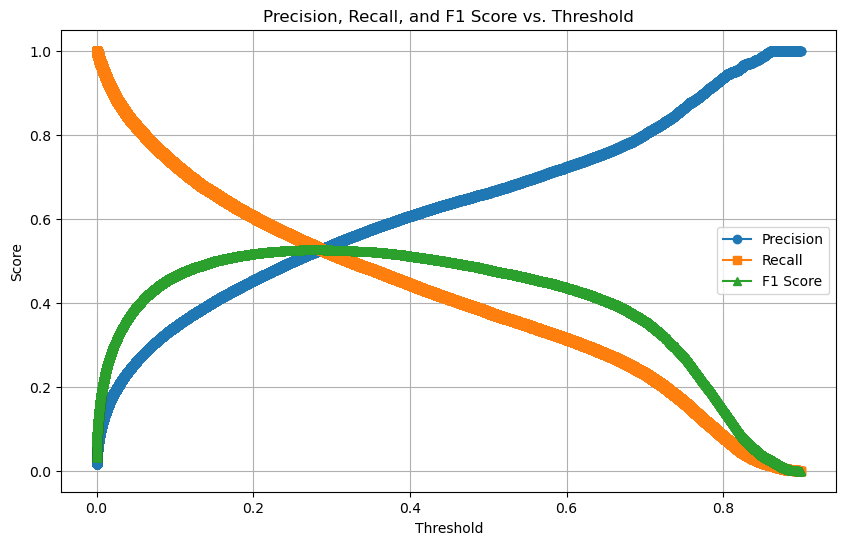

In [130]:
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], label='Precision', marker='o')
plt.plot(thresholds, recall[:-1], label='Recall', marker='s')
plt.plot(thresholds, f1_scores[:-1], label='F1 Score', marker='^')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1 Score vs. Threshold')
plt.legend()
plt.grid()
plt.show()

PIXEL ACCURACY

In [47]:
y_true_flat = Y_test.flatten()
y_pred_flat = (predictions.flatten() > 0.5).astype(int)

In [49]:
correct_pixels = np.sum(y_true_flat == y_pred_flat)
total_pixels = y_true_flat.size

pixel_accuracy = correct_pixels / total_pixels

print(f"Pixel Accuracy: {pixel_accuracy:.3f}")

Pixel Accuracy: 0.986
